<a href="https://colab.research.google.com/github/katemartian/LHoutputsManuscript/blob/master/LHoutputs_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LHA-DA All tests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [ ]:
%run FiberPhotometryDataAnalysis_elife.ipynb

All Fiber Photometry functions are ready to use


In [ ]:
mice = ['VD10','VD11','VD12','VD13','VD14']
outputs = ['LHA-VTA','DA VTA']
tests = ['APT','SCT','OFT','TST']

In [ ]:
filename = 'LH-DA.h5'

# Save recordings to HDF file

In [ ]:
folders = {'APT': ['/content/drive/My Drive/!lab/!FP/2019-02-13 VD mice Airpuff/raw/'],
           'SCT': ['/content/drive/My Drive/!lab/!FP/2019-02-21 VD mice Sucrose/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-03-01 LRD and VD Sucrose/raw/'],
           'OFT': ['/content/drive/My Drive/!lab/!FP/2019-04-11 LRD VD OFT-TST2/raw/'],
           'TST': ['/content/drive/My Drive/!lab/!FP/2019-03-26 LRD VD TST/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-04-11 LRD VD OFT-TST2/raw/']}

#### APT

In [ ]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      apt_full_file_names.append(folder+f)
#apt_full_file_names

In [ ]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','DA VTA','LHA-DRN','DA VTA-DRN']
  experiment = sepname[4]
  if experiment[-1] == 'f':
    trial = '1'
  else:
    trial = experiment[-1]
 

 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':
    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0])}
    signals   =  {'LHA-VTA': np.array(df_green.iloc[1::2,0])}

  elif mouse == 'VD11':
    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_green.iloc[ ::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_red.iloc[1::2,0])}

  else:
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_red.iloc[ ::2,0])}

 # Time vector
  realtime_fp = create_realtime(10,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ----------------------------------------------------------
  key_name = find_files(folder,[mouse, experiment,'keypress'])[0]
  df_key = pd.read_csv(folder+'/'+key_name,sep=' ',index_col=False)
  realtime_ap = create_realtime(10,mm=list(df_key.iloc[:,1]),ss=list(df_key.iloc[:,2]),ms=list(df_key.iloc[:,3]))
  airpuff = time_to_seconds(realtime_ap,realtime_fp[0])

  for i in range(len(airpuff)):
    if airpuff[i] < 0:
      airpuff[i] = airpuff[i] + 3600
  airpuff = np.array(airpuff).reshape(len(airpuff),1)
  airpuff = airpuff - 0.5

  events = {'airpuff': np.array(airpuff).reshape(len(airpuff),1)}
    
  raw = FiberPhotometryRecording(signals,references,time_,events,mouse=mouse,test='APT',trial=trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial)

VD11 APT 1
VD10 APT 1
VD14 APT 1
VD13 APT 1
VD12 APT 1


#### SCT

In [ ]:
test = 'SCT'
sct_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      sct_full_file_names.append(folder+f)
#sct_full_file_names

In [ ]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'e':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0])}

  elif [mouse,trial] in [['VD12','1']]:
    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_green.iloc[ ::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_red.iloc[1::2,0])}
  
  else:  
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_red.iloc[ ::2,0])}
 
 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  # Sucrose licking measured by Anymaze
  licks = df_am['Lick active']
  consumption = event_onoffset(licks,time_am)
  if len(consumption) != 0:
    consumption = adjust_intervals_durations(consumption,1,1)

  if len(consumption.shape) == 1:
    consumption = consumption.reshape(1,2)
    print(consumption)

  events = {'consumption': consumption,
             'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement},
                     'licks': {'time': time_am,
                             'values': licks}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCT',trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial)

VD12 SCT 1
VD10 SCT 1
VD13 SCT 1
VD11 SCT 1
VD14 SCT 1
VD14 SCT 2
VD10 SCT 2
VD10 SCT 3
VD11 SCT 3
VD11 SCT 2
VD12 SCT 3
VD12 SCT 2
VD13 SCT 2
VD13 SCT 3
VD14 SCT 3
VD10 SCT 4
VD11 SCT 4
VD12 SCT 4
VD13 SCT 4
VD14 SCT 4


#### OFT

In [ ]:
test = 'OFT'
oft_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      oft_full_file_names.append(folder+f)
#oft_full_file_names

In [ ]:
for file_ in oft_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'T':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0])}

  else:
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_red.iloc[ ::2,0])}

  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobilityany_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'OFT',trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial)

VD10 OFT 1
VD11 OFT 1
VD14 OFT 1
VD12 OFT 1
VD13 OFT 1


#### TST

In [ ]:
test = 'TST'
tst_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      tst_full_file_names.append(folder+f)
#tst_full_file_names

In [ ]:
for file_ in tst_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'T':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0])}
  
  else:

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'DA VTA': np.array(df_green.iloc[1::2,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'DA VTA': np.array(df_red.iloc[ ::2,0])}

  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,test,trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial)

VD11 TST 1
VD10 TST 1
VD13 TST 1
VD12 TST 1
VD14 TST 1
VD10 TST 2
VD11 TST 2
VD12 TST 2
VD14 TST 2
VD13 TST 2


# Processing

In [ ]:
info_for_array = {'airpuff': {'window': [-5.0,5.0],
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (12,10)},
              'consumption': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (24,10)},
               'immobility': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                             'figsize': (24,10)}}

In [ ]:
for test in tests:
  for mouse in mice:
    for trial in ['1','2','3','4']:

        r = FiberPhotometryRecording()
        r.loadRecording(filename,mouse,test,trial)
        if r.rawSignals != {}:
          r.getDFF(airpls_lambda=5e3,smooth_win=1.5)#,plot=True,save=True)
          if r.measurements is not None:
            r.smoothMeasurements(smooth_win=2)
            r.interpolateMeasurements(period=0.1)
          r.getPerievents(info_for_array)#,plot=True,save=True)
          r.saveRecording(filename)
        del r

The recording for mouse VD10 in the experiment APT-1 is successfully loaded.
The recording for animal VD10 in the experiment APT-2 is not saved in the file.
The recording for animal VD10 in the experiment APT-3 is not saved in the file.
The recording for animal VD10 in the experiment APT-4 is not saved in the file.
The recording for mouse VD11 in the experiment APT-1 is successfully loaded.
The recording for animal VD11 in the experiment APT-2 is not saved in the file.
The recording for animal VD11 in the experiment APT-3 is not saved in the file.
The recording for animal VD11 in the experiment APT-4 is not saved in the file.
The recording for mouse VD12 in the experiment APT-1 is successfully loaded.
The recording for animal VD12 in the experiment APT-2 is not saved in the file.
The recording for animal VD12 in the experiment APT-3 is not saved in the file.
The recording for animal VD12 in the experiment APT-4 is not saved in the file.
The recording for mouse VD13 in the experiment AP

# Summary plot 

#### Set attributes

In [ ]:
with h5py.File(filename, 'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests
  f.attrs['good recordings'] = [['VD10','APT','1','LHA-VTA'],
                                ['VD11','APT','1','LHA-VTA'],
                                ['VD11','APT','1','DA VTA'],
                                ['VD12','APT','1','DA VTA'],
                                ['VD13','APT','1','DA VTA'],
                                ['VD14','APT','1','LHA-VTA'],
                                ['VD14','APT','1','DA VTA'],
                                ['VD10','SCT','1','LHA-VTA'],
                                ['VD10','SCT','2','LHA-VTA'],
                                ['VD10','SCT','3','LHA-VTA'],
                                ['VD10','SCT','4','LHA-VTA'],
                                ['VD11','SCT','1','LHA-VTA'],
                                ['VD11','SCT','2','LHA-VTA'],
                                ['VD11','SCT','3','LHA-VTA'],
                                ['VD11','SCT','1','DA VTA'],
                                ['VD11','SCT','3','DA VTA'],
                                ['VD11','SCT','4','DA VTA'],#?
                                ['VD12','SCT','3','LHA-VTA'],
                                ['VD12','SCT','4','LHA-VTA'],
                                ['VD12','SCT','3','DA VTA'],
                                ['VD12','SCT','4','DA VTA'],
                                ['VD13','SCT','4','LHA-VTA'],
                                ['VD13','SCT','1','DA VTA'],#?
                                ['VD13','SCT','2','DA VTA'],#?
                                ['VD13','SCT','4','DA VTA'],#?
                                ['VD14','SCT','1','LHA-VTA'],
                                ['VD14','SCT','2','LHA-VTA'],
                                ['VD14','SCT','3','LHA-VTA'],
                                ['VD14','SCT','4','LHA-VTA'],
                                ['VD14','SCT','1','DA VTA'],
                                ['VD14','SCT','2','DA VTA'],
                                ['VD10','OFT','1','LHA-VTA'],
                                ['VD11','OFT','1','LHA-VTA'],
                                ['VD11','OFT','1','DA VTA'],
                                ['VD12','OFT','1','LHA-VTA'],
                                ['VD12','OFT','1','DA VTA'],
                                ['VD14','OFT','1','DA VTA'],
                                ['VD10','TST','2','LHA-VTA'],
                                ['VD11','TST','2','LHA-VTA'],#?
                                ['VD11','TST','2','DA VTA'],
                                ['VD12','TST','2','LHA-VTA'],#?
                                ['VD12','TST','2','DA VTA'],#?
                                ['VD14','TST','1','LHA-VTA'],
                                ['VD14','TST','1','DA VTA'],
                                ['VD14','TST','2','DA VTA']]#?

#### APT

In [ ]:
apt = FiberPhotometryTest(filename,'APT')

Experiment information for test APT is successfully loaded.


In [ ]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,2]]})

VD11,1 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for DA VTA airpuff-onset
VD10,1 VD11,1 VD14,1 .
Saved dF/F mean traces for LHA-VTA airpuff-onset


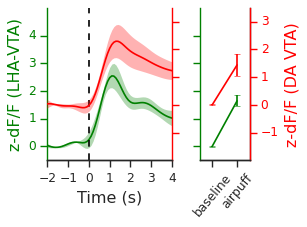

In [ ]:
apt.plotMeans('LHA-VTA','airpuff',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['baseline','airpuff'],xlim=[-2,4],
              ylim=[-0.5,5],yticks=[0,1,2,3,4],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-2,3.5],yticks1=[-1,0,1,2,3],color1='red',ylab1='z-dF/F (DA VTA)',
              figsize=(4,3))
plt.show()

#### SCT

In [ ]:
sct = FiberPhotometryTest(filename,'SCT')

Experiment information for test SCT is successfully loaded.


In [ ]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[3,4]],
                        'consumption-offset': [[-2,0],[0,2]]})

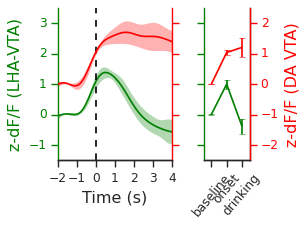

In [ ]:
sct.plotMeans('LHA-VTA','consumption',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['baseline','onset','drinking'],
              ylim=[-1.5,3.5],ylab='z-dF/F (LHA-VTA)',xlim=[-2,4],
              ylim1=[-2.5,2.5],ylab1='z-dF/F (DA VTA)',color1='red',
              figsize=(4,3))
plt.show()

#### OFT

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [ ]:
oft.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-1,0],[0,1.5],[1.5,3]]})

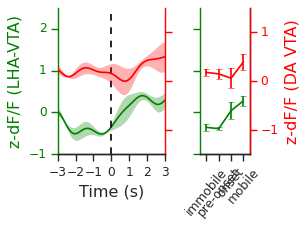

In [ ]:
oft.plotMeans('LHA-VTA','immobility','offset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

#### TST

In [ ]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [ ]:
tst.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-0.5,0],[0,1],[1,3]]})

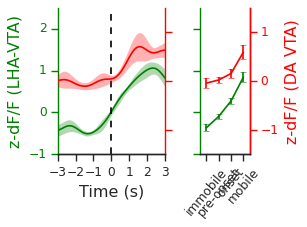

In [ ]:
tst.plotMeans('LHA-VTA','immobility','offset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

# Example trace

The recording for mouse VD14 in the experiment APT-1 is successfully loaded.


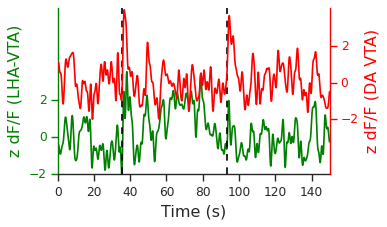

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','APT','1')

r.plotExample(['LHA-VTA','DA VTA'],event='airpuff',
              t0=70,t1=220,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)', ylabel1='z dF/F (DA VTA)',
              ylim=[-2,7],ylim1=[-5,4.1],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-DA/LHA-DA_APT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment SCT-2 is successfully loaded.


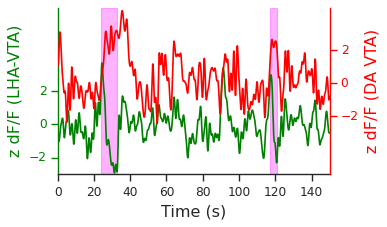

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','SCT','2')

r.plotExample(['LHA-VTA','DA VTA'],'consumption',
              t0=30,t1=180,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)', ylabel1='z dF/F (DA VTA)',
              ylim=[-3,7],ylim1=[-5.5,4.55],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-DA/LHA-DA_SCT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment OFT-1 is successfully loaded.


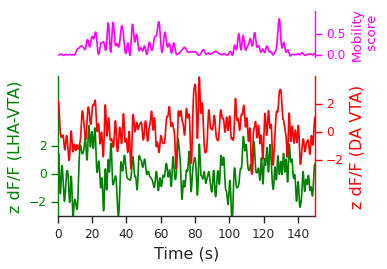

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','OFT','1')

r.plotExample(['LHA-VTA','DA VTA'],measure='movement',
              t0=170,t1=320,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)',ylabel1='z dF/F (DA VTA)',
              ylim=[-3,7],ylim1=[-6,4],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.05,1.05],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-DA/LHA-DA_OFT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment TST-1 is successfully loaded.


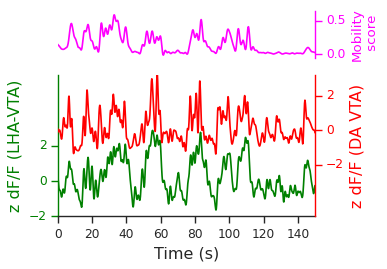

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','TST','1')

r.plotExample(['LHA-VTA','DA VTA'],measure='movement',
              t0=370,t1=520,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)',ylabel1='z dF/F (DA VTA)',
              ylim=[-2,6],ylim1=[-5,3.2],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.05,0.65],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-DA/LHA-DA_TST_example.pdf')
plt.show()

# Save summary data to excel file for statistical analysis

In [ ]:
apt = FiberPhotometryTest(filename,'APT')
sct = FiberPhotometryTest(filename,'SCT')
oft = FiberPhotometryTest(filename,'OFT')
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test APT is successfully loaded.
Experiment information for test SCT is successfully loaded.
Experiment information for test OFT is successfully loaded.
Experiment information for test TST is successfully loaded.


In [ ]:
df_apt = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'])
df_sct = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'])
df_oft = oft.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst = tst.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_oft_mob = oft.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst_mob = tst.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])

In [ ]:
!pip install xlsxwriter
import xlsxwriter

     |████████████████████████████████| 153kB 9.2MB/s 


In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig3_DA.xlsx', engine='xlsxwriter')
df_apt.to_excel(writer,sheet_name='APT', index=False)
df_sct.to_excel(writer,sheet_name='SCT', index=False)
df_oft.to_excel(writer,sheet_name='OFT', index=False)
df_tst.to_excel(writer,sheet_name="TST", index=False)
df_oft_mob.to_excel(writer,sheet_name='OFT_mobileScore', index=False)
df_tst_mob.to_excel(writer,sheet_name="TST_mobileScore", index=False)
writer.save()